# Введение в аналитику. Домашнее задание - 1

Мы будем работать с датасетом про покупки клиентов в онлайн-магазине. По характеристикам клиентов нам нужно понять, купит клиент товар или нет.

Целевая величина - Revenue (факт покупки).

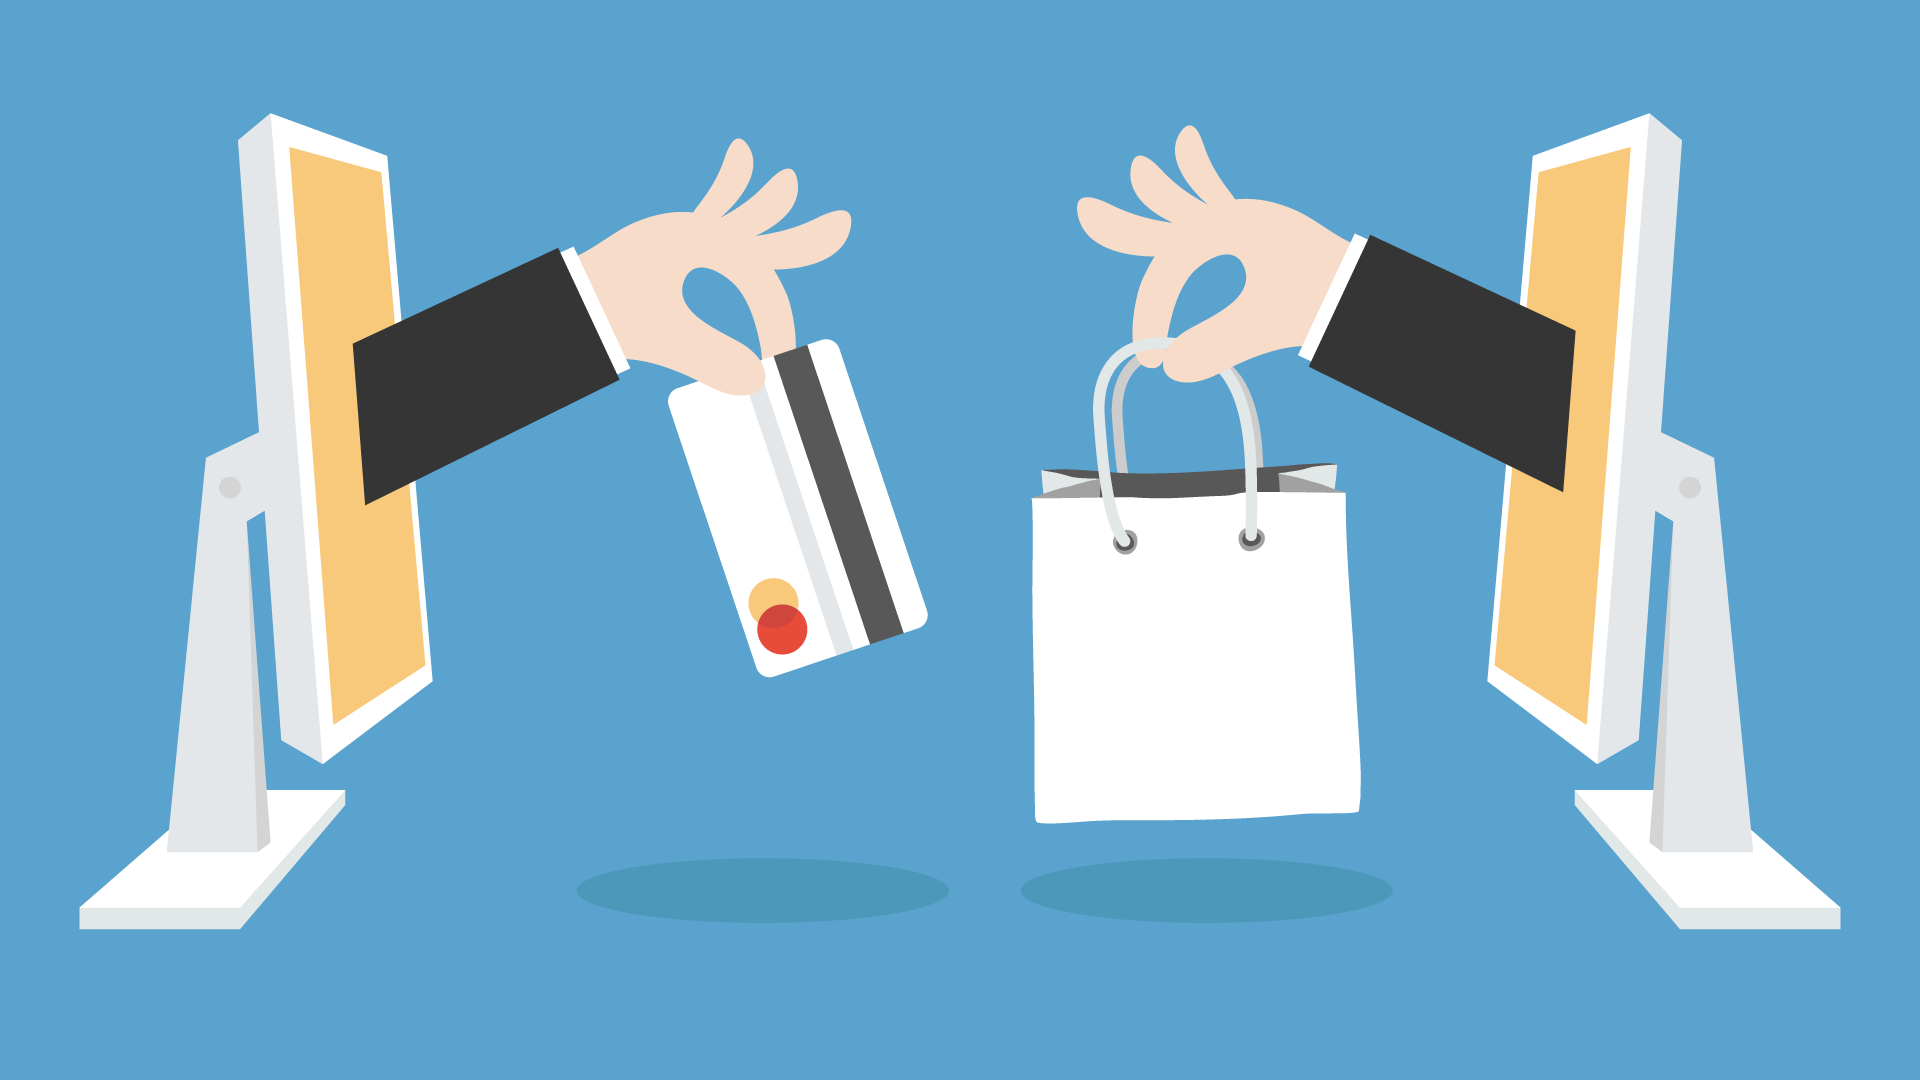

Задания ноутбука проверяются в гугл-формах в полуавтоматическом режиме. Ответы на вопросы, а также ссылку на ноутбук с выполненным домашнем задании в google colab прикрепите в [эту форму](https://docs.google.com/forms/d/e/1FAIpQLSdo_QG4Msqsvxhbd-GsAr8orBhByo1Sg9Y4RtzBX2w5FN43QQ/viewform?usp=sf_link).

* Задание 0 не оценивается
* Задания 1-16 весят 1 балл
* Задания 17-18 весят по 2 балла

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### **Описание данных**

**Online Shoppers Purchasing Intention Dataset**

The `Revenue` attribute can be used as the class label.

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* `Bounce Rate`, `Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

* The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Задание 0

Изучите данные:

* Посмотрите на названия колонок

* Выведите на экран 10 случайных строк таблицы

* Посмотрите на размер таблицы

In [ ]:
# колонки
df.columns.tolist()

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [ ]:
# 10 случайных строк
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11739,2,54.5,4,29.5,11,1055.750000,0.000000,0.026667,0.00000,0.0,Dec,2,2,1,2,New_Visitor,False,False
2767,0,0.0,0,0.0,35,1386.716667,0.020000,0.039270,14.96432,0.0,May,1,8,4,20,Returning_Visitor,True,True
7451,4,95.8,2,35.7,14,380.266667,0.000000,0.011111,0.00000,0.0,Oct,2,4,7,2,New_Visitor,False,False
8910,0,0.0,0,0.0,38,1326.430556,0.005263,0.016667,0.00000,0.0,Nov,1,1,1,2,Returning_Visitor,False,False
6692,1,5.0,0,0.0,6,119.600000,0.000000,0.014286,0.00000,0.0,Jul,2,2,1,2,New_Visitor,False,True
7704,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.00000,0.0,June,1,8,1,1,Returning_Visitor,False,False
9961,1,0.0,2,10.0,69,1310.636905,0.010870,0.032793,0.00000,0.0,Nov,2,3,1,3,Returning_Visitor,True,False
2541,0,0.0,0,0.0,50,998.954545,0.007600,0.025933,0.00000,0.8,May,2,2,3,2,Returning_Visitor,False,False
3477,0,0.0,0,0.0,7,191.000000,0.000000,0.028571,0.00000,0.0,May,2,4,4,2,Returning_Visitor,False,False
6688,3,106.6,0,0.0,11,203.980000,0.000000,0.004444,0.00000,0.0,Jul,2,2,1,3,New_Visitor,False,False


In [ ]:
# размер таблицы
df.shape

(12330, 18)

## Исследование данных

## Задание 1

В скольких столбцах таблицы есть пропущенные значения?

In [ ]:
missing = df.isnull().sum()
missing[missing > 0].count()

3

**Ответ:** пропущенные значения есть в трех столбцах таблицы

In [ ]:
# посмотрим, в каких столбцах пропуски
df.isna().sum()[df.isna().sum() > 0]

Informational_Duration     199
ProductRelated_Duration    491
ExitRates                   99
dtype: int64

## Задание 2

В скольких числовых столбцах медиана больше среднего значения?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**Вывод 1:** не существует столбцов в исходном датафрейме, где медиана больше среднего значения.

Проделаем поиск таких столбцов кодом. Проверим свое наблюдение

In [ ]:
(df.select_dtypes(include=[np.number]).median() > df.select_dtypes(include=[np.number]).mean()).sum()


0

**Вывод 2:** Таких числовых столбцов действительно 0

## Задание 3

Сколько дублирующихся строк в данных? Ответьте на вопрос, а затем удалите дубликаты.

In [ ]:
# ищем дубликаты
df.duplicated().sum()

109

**Ответ:** 109 дублирующихся строк

In [ ]:
# удалим дубли
df = df.drop_duplicates()

In [ ]:
# убедимся, что дублей больше нет
df.duplicated().sum()

0


## Однофакторный анализ

Начнём с анализа признака Product Related Duration.

## Задание 4

Постройте гистограмму распределения признака Product Related Duration.

Что можно сказать по гистограмме?

In [ ]:
# так как мы начинаем работать со столбцом ProductRelated_Duration, сначала надо удалить пропуски, которые в нем есть и работать уже без них
df = df.dropna(subset=['ProductRelated_Duration'])


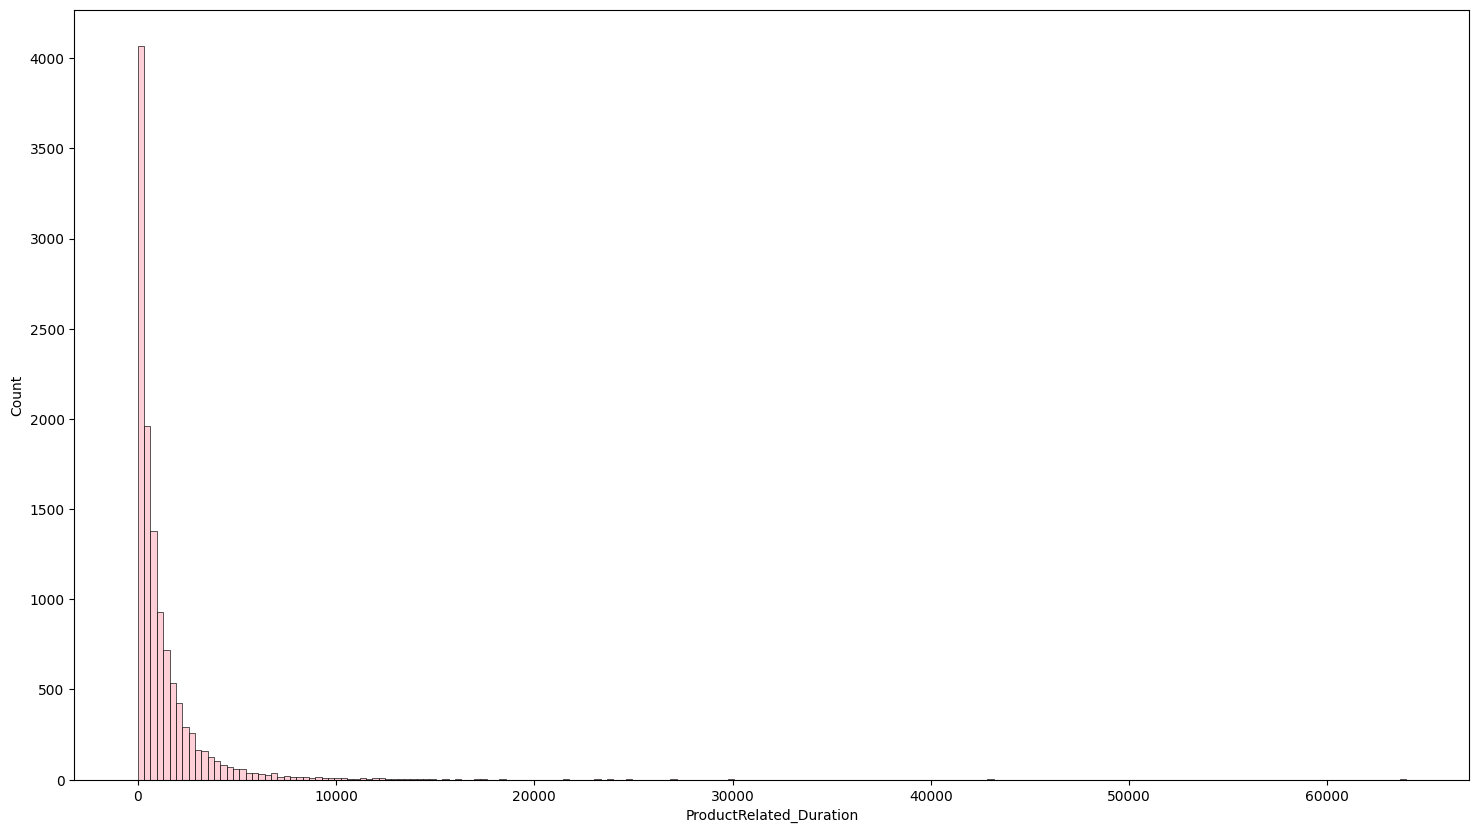

In [ ]:
plt.figure(figsize=(18,10))

sns.histplot(df.ProductRelated_Duration, bins=200, color = 'pink');

**Вывод:** по гистограмме можно сказать, что большинство пользователей проводит относительно небольшое время на страницах, связанных с продуктом. Есть малое количество пользователей, оторые проводят большое количество времени на этих страницах. Распределение данных похоже на экспоненциальное (правостороннее ассиметричное)

## Задание 5

Какая доля среди всех клиентов провела 0 минут/секунд на страницах, посвященных продукту? Ответ переведите в проценты и округлите до целого числа.

In [ ]:
round(100 * len(df[df.ProductRelated_Duration == 0]) / len(df))

5

## Задание 6

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.


<ipython-input-19-39644e3c9514>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='spring')


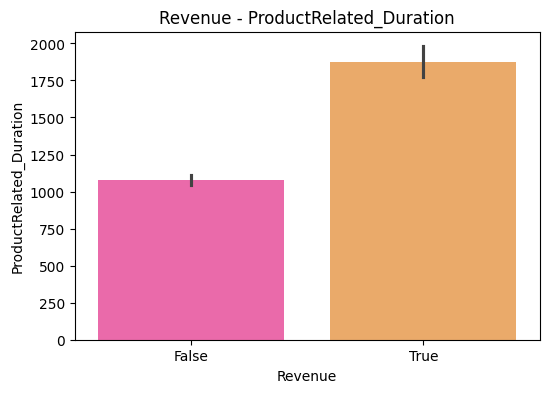

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='spring')
plt.title('Revenue - ProductRelated_Duration')
plt.show()

**Вывод:**  Визуально видно, что клиенты, которые купили товар (True), провели больше времени на страницах, связанных с продуктом, чем те, кто товар не купил (False).

## Задание 7

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

In [ ]:
# нулевая гипотеза: время, проведенное на страницах, связанных с продуктом (ProductRelated_Duration), не связана с вероятностью покупки (Revenue).
# альтернативная (гипотеза, сформулированная по заданию 6): время, проведенное на страницах, связанных с продуктом (ProductRelated_Duration), связано с вероятностью покупки (Revenue).

from scipy.stats import mannwhitneyu
sample1 = df[df.Revenue == True]['ProductRelated_Duration']
sample2 = df[df.Revenue == False]['ProductRelated_Duration']

statistic, p_value = mannwhitneyu(sample1, sample2)

print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются.")
    print("Альтернативная гипотеза подтверждается")

else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")
    print("Альтернативную гипотезу отвергаем")

Статистика теста Манна-Уитни: 12060461.5
p-значение: 1.162178315994545e-115
Отвергаем нулевую гипотезу: средние значимо различаются.
Альтернативная гипотеза подтверждается


**Вывод:** *Отвергаем нулевую гипотезу* об отсутствии связи между временем, проведенном на страницах, посвященных продукту, и фактом покупки. Гипотеза (альтернативная) о связи времени, проведенного на страницах, связанных с продуктом, и фактом покупки *подтверждается*

## Задание 8

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

**Ответ:**
Исходя из гистограммы, визуально видно, что нормального распределения данных нет. При этом, для проверки гипотезы было необходимо сравнить две независимые выборки. При этом сами выборки не являются маленькими, поэтому здесь удобно использовать тест Манна-Уитни

## Задание 9

Постройте матрицу корреляций всех числовых столбцов друг с другом. Используйте корреляцию Спирмена.

Какой столбец наиболее сильно коррелирует с Revenue? В ответе укажите значение коэффициента корреляции, округленного до сотых.

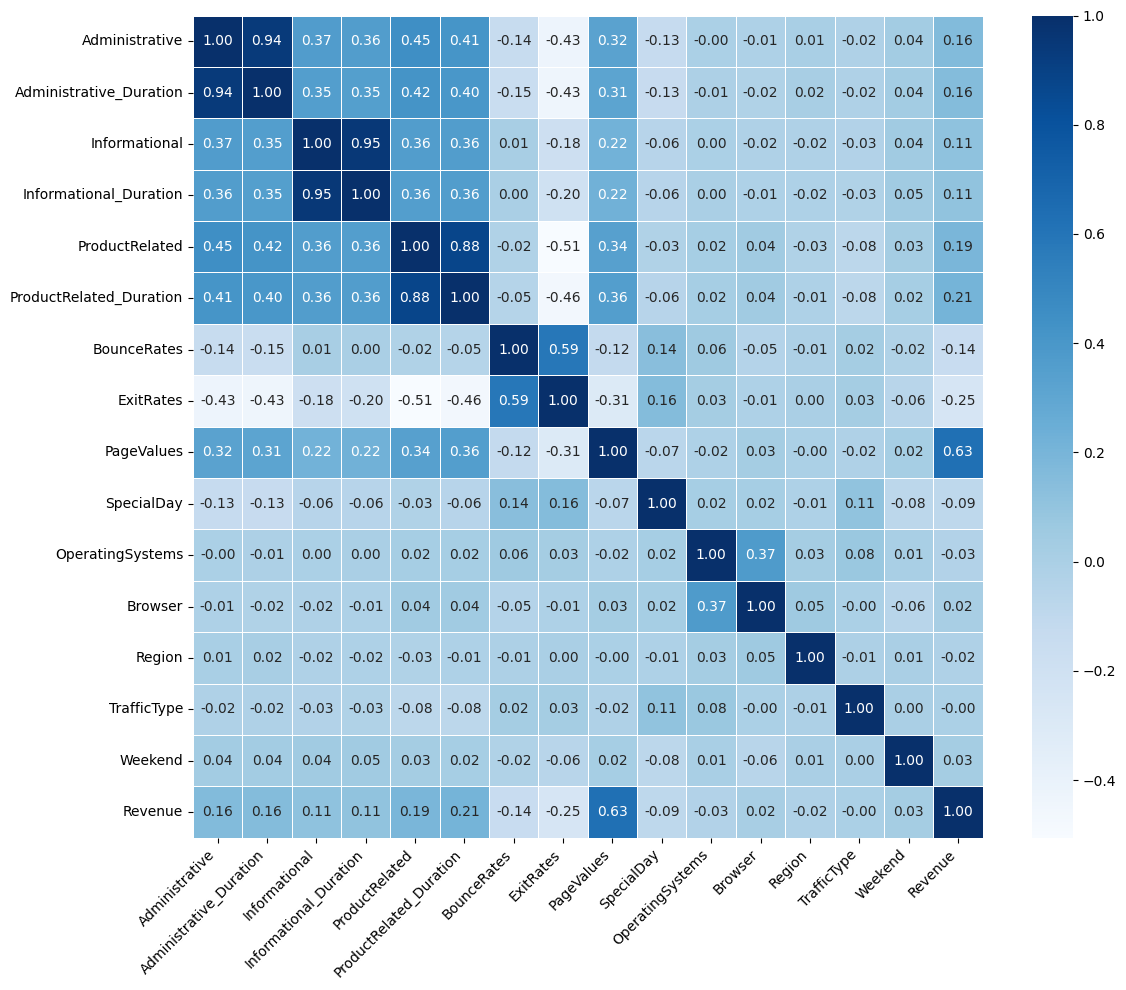

In [ ]:
corr = df.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(12, 10))

sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Ответ:** со столбцом Revenue наиболее сильно коррелирует столбец PageValues. Коэффициент корреляции с округлением до сотых равен 0,63 (это визуально видно  из построенной матрицы корреляции и подтверждается кодом)

## Задание 10

Возьмите столбец, который имеет корреляцию с Revenue, равную по модулю 0.14, и проведите анализ этого столбца по аналогии с тем, как вы действовали со столбцом ProductRelated_Duration.

Постройте гистограмму распределения столбца. Какое у него распределение?

In [ ]:
#находим такой столбец
corr_with_revenue = corr['Revenue']
target_columns = corr_with_revenue[(corr_with_revenue.abs().round(2) == 0.14)].index

if target_columns.empty == False:
    for col in target_columns:
        print(col)

BounceRates


Проверим по построенной матрице Спирмена. Действительно, столбец BounceRates
имеет такую корреляцию по модулю

**Однофакторный анализ столбца BounceRates:**

<Axes: xlabel='BounceRates', ylabel='Count'>

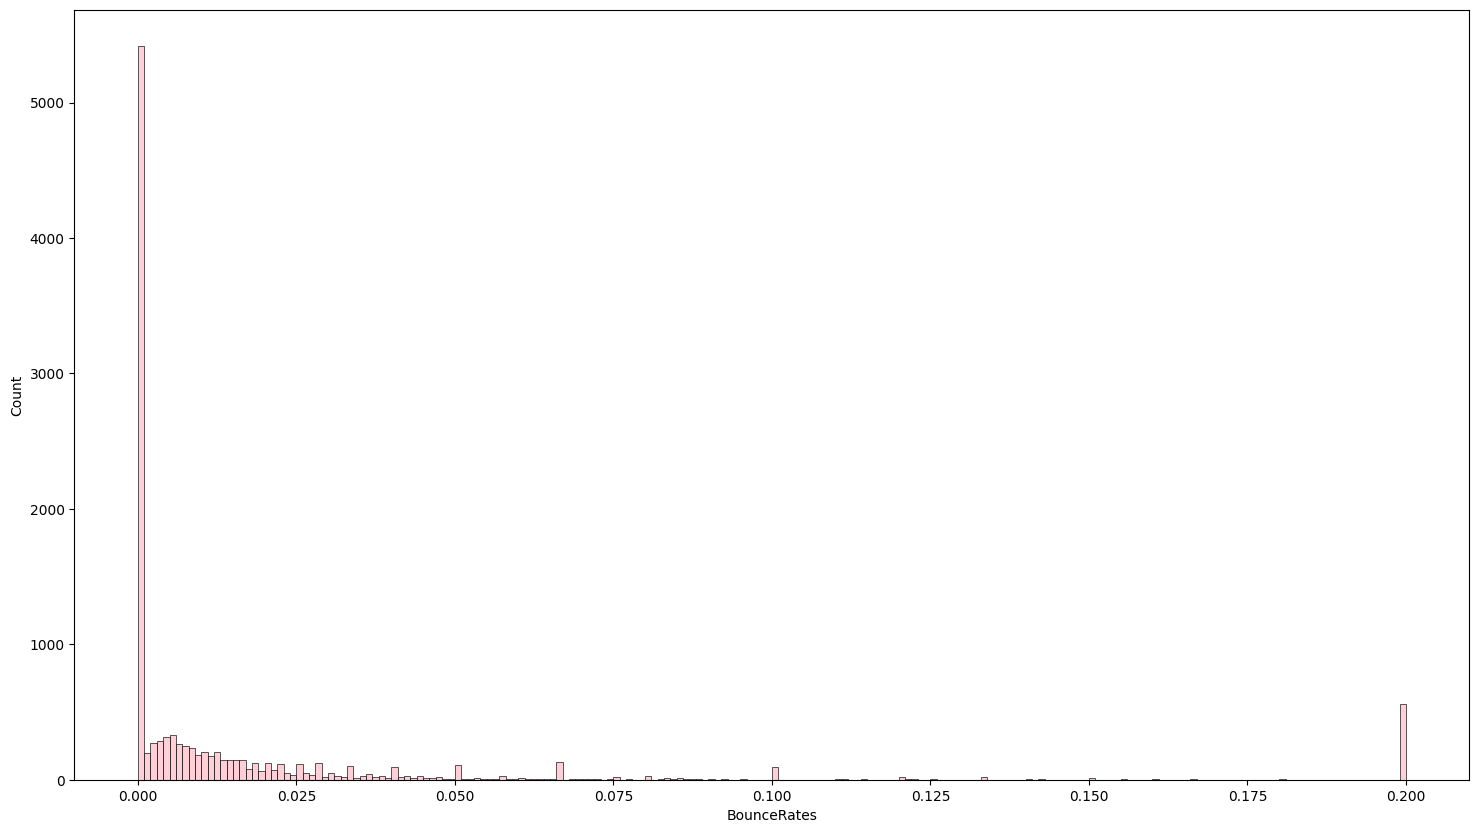

In [ ]:
plt.figure(figsize=(18,10))

sns.histplot(df.BounceRates, bins=200, color = 'pink')


**Вывод:**  
Показатель bounceRates  - относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают его, не совершая никаких действий.
Из построенной гистограммы мы видим, что много пользователей заходит на страницу и уходит, не совершая никаких действий.

Распределение данных не является нормальным, равномерным или биномиальным, оно похоже на правосторонне-асимметричное

Определим, какая доля (в %)  среди всех пользователей зашла на веб-страницу и ушла, не совершив никаких действий (BounceRates = 0) по отношению к пользователям, где BounceRates > 0

In [ ]:
round(100 * len(df[df.BounceRates == 0]) / len(df))

45

Таким образом доля (в %) среди всех пользователей зашла на веб-страницу и ушла, не совершив никаких действий (BounceRates = 0) по отношению к пользователям, где BounceRates > 0 составила 45%

## Задание 11

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.

<ipython-input-27-b24639575ff5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='BounceRates', data = df, palette='spring')


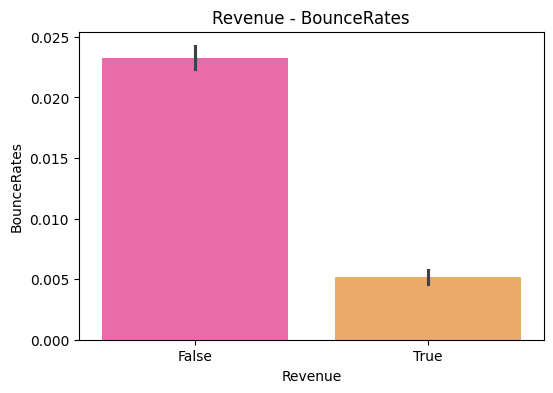

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='BounceRates', data = df, palette='spring')
plt.title('Revenue - BounceRates')
plt.show()

**Вывод:** клиенты, которые купили товар (True), намного меньше отказывались от посещения веб-страницы (то есть, реже заходили и выходили, не совершая никаких действий)

## Задание 12

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

In [ ]:
# нулевая гипотеза: взаимосвязи между показателями Revenue и BounceRates нет
# альтернативная гипотеза: взаимосвязь  между показателями Revenue и BounceRates есть - клиенты, которые купили товар (True), намного меньше отказывались от посещения веб-страницы


ample1 = df[df.Revenue == True]['BounceRates']
sample2 = df[df.Revenue == False]['BounceRates']

statistic, p_value = mannwhitneyu(sample1, sample2)

print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)

lpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются.")
    print("Альтернативная гипотеза подтверждается")

else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")
    print("Альтернативную гипотезу отвергаем")

Статистика теста Манна-Уитни: 17954853.0
p-значение: 0.0
Отвергаем нулевую гипотезу: средние значимо различаются.
Альтернативная гипотеза подтверждается


**Вывод:** *Отвергается* нулевая гипотеза об отсутствии связи в показателях BounceRates и Revenue

*Альтернативная* гипотеза подтверждается, следовательно  клиенты, которые купили товар (True), намного меньше отказывались от посещения веб-страницы (то есть, реже заходили и выходили, не совершая никаких действий)

## Задание 13

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

**Ответ:**
Распределение данных является ассиметричным, две выборки независимы, их размер не является небольшим. Используем непараметрический тест Манна-Уитни

## Задание 14

Столбцы OperatingSystems, Browser, Region, TrafficType, Weekend - на самом деле категориальные, а не числовые. Измените тип этих столбцов на `object`.

На данных момент сколько теперь столбцов в таблице имеют тип `object`?

In [ ]:
#проверим, сколько колонок с типом object изначально
len(df.select_dtypes(include='object').columns)

2

In [ ]:
convert = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']
df[convert] = df[convert].astype('object')

In [ ]:
#посмотрим, как изменилось количество столбцов с типом данных object
len(df.select_dtypes(include='object').columns)

7

**Вывод:** действительно, 5 столбцов изменили свой тип на object. Теперь с типом object 7 столбцов

## Задание 15

Переведите Revenue в категории по правилу: True -> Yes, False -> No.

После этого постройте аналог матрицы корреляций между парами категориальных столбцов с помощью V-меры Крамера.

Какой категориальный столбец сильнее всего "коррелирует" с Revenue?



In [ ]:
# переводим в категории
df['Revenue'] = df['Revenue'].map({True: 'Yes', False: 'No'})

In [ ]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [ ]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.061666,0.066277,0.046263,0.190790,0.137703,0.070173,0.178762
OperatingSystems,0.061666,1.000000,0.594231,0.115393,0.189389,0.455869,0.122047,0.079173
Browser,0.066277,0.594231,1.000000,0.125647,0.196287,0.504667,0.088290,0.046917
Region,0.046263,0.115393,0.125647,1.000000,0.086021,0.175391,0.031097,0.030238
TrafficType,0.190790,0.189389,0.196287,0.086021,1.000000,0.374991,0.150192,0.172481
VisitorType,0.137703,0.455869,0.504667,0.175391,0.374991,1.000000,0.049588,0.104694
Weekend,0.070173,0.122047,0.088290,0.031097,0.150192,0.049588,1.000000,0.028065
Revenue,0.178762,0.079173,0.046917,0.030238,0.172481,0.104694,0.028065,1.000000


**Вывод:** сильнее всего коррелирует с Revenue столбец Month

Верните Revenue обратно к типу Bool.

In [ ]:
df['Revenue'] = df['Revenue'].map({'Yes': True, 'No': False})


## Задание 16

Постройте матрицу $\phi_k$-корреляций всех столбцов в таблице.

Какой фактор сильнее всего коррелирует с Revenue? В ответе укажите значение корреляции, округленное до сотых.

In [ ]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.4 MB/s eta 0:00:00


interval columns not set, guessing: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


<Axes: >

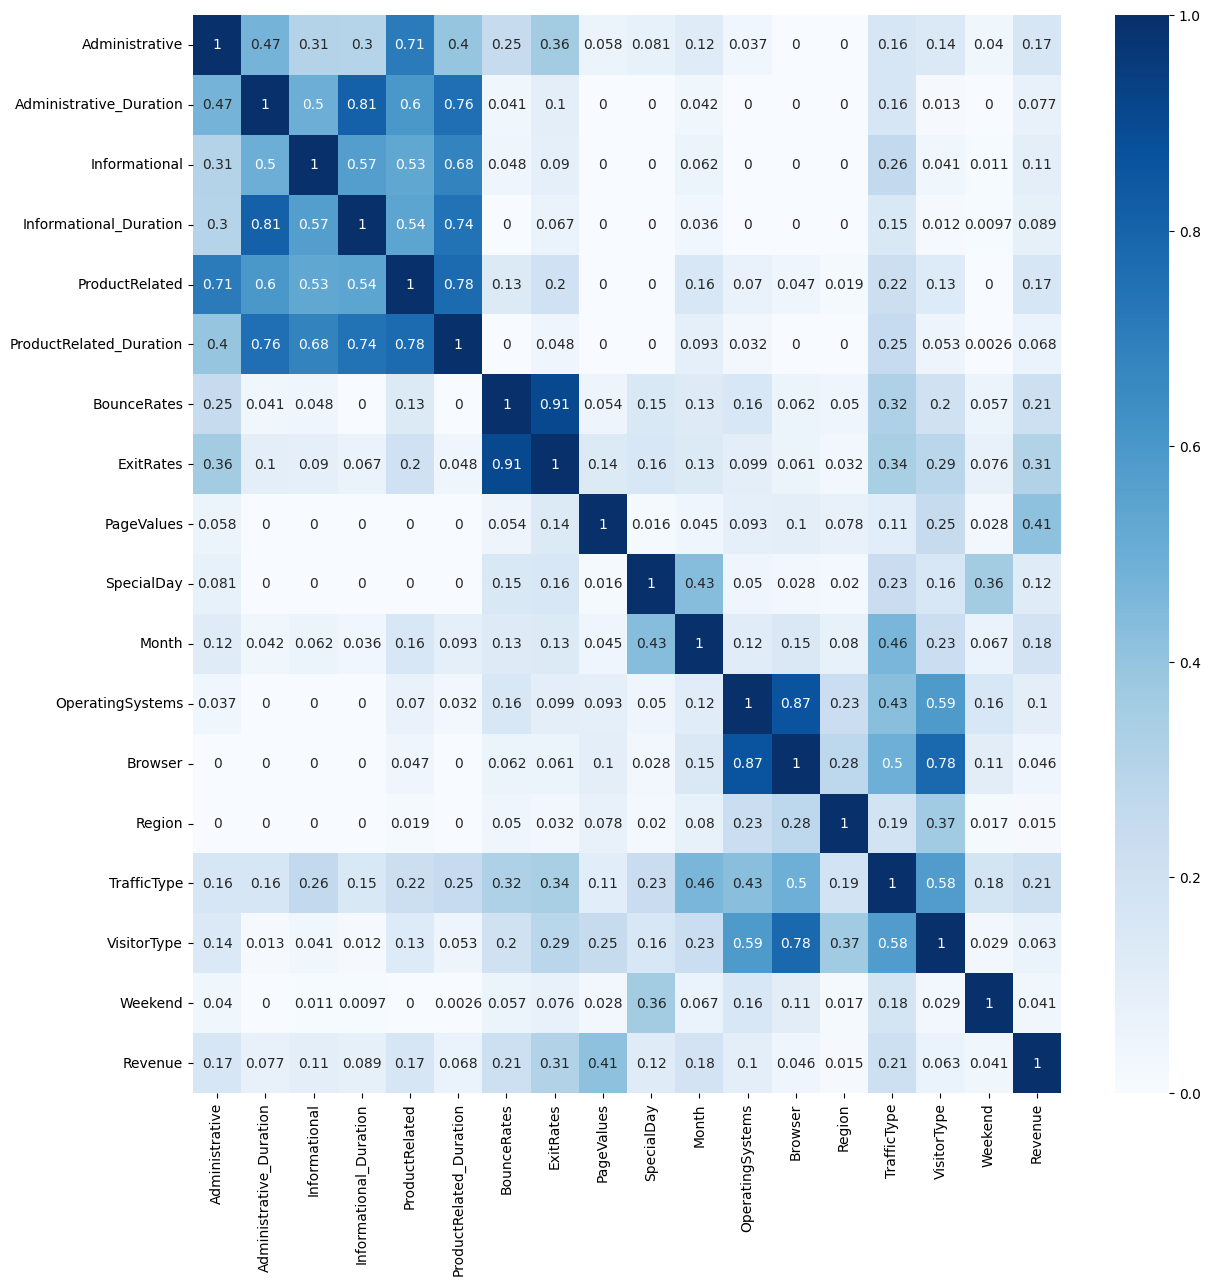

In [ ]:
import phik

plt.figure(figsize=(14,14))

ph = df.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

Таким образом, сильнее всего с Revenue коррелирует столбец PageValues. Коэффициент корреляции равен 0,41

## Задание 17

Постройте любой из рассмотренных в первом занятии курса дашборд по данным, сохраните его в html и скачайте себе на компьютер.

Выложите файл с дашбордом на яндекс/гугл-диск и прикрепите ссылку на него в этом задании.

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.0 MB/s eta 0:00:00


In [ ]:
# дашборд по исходным данным
import sweetviz as sv
df = pd.read_csv(DATASET)

report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Ссылка: https://clck.ru/3CBqVQ (надо скачать файлик и открыть в браузере, так как на гугл диске отображается html-скрипт)

## Задание 18

Наша цель - понять, какие факторы сильнее всего влияют на Revenue и почему.

Проанализируйте построенный дашборд и ответьте текстом на вопросы:

1) Есть ли проблемы в данных (пропуски, дубли, выбросы, ошибочные значения)?

2) Какие три фактора имеют наиболее сильное влияние на Revenue?

3) Постарайтесь описать смысл каждого из этих факторов, а также для каждого из этих факторов объясните по смыслу, почему он сильно влияет на Revenue

4) Укажите два наиболее коррелирующих между собой фактора (без учета Revenue) и объясните, почему между ними такая большая корреляция?

**1)** Да, в данных есть проблемы и они требуют определенной работы, чтобы их анализ был более достоверным. В исходных данных имеется 109 дублей, в столбцах Informational_Duration, ProductRelated_Duration и ExitRates имеются пропущенные значения. Про наличие выбросов сказать сложно, однако есть не совсем верные значения.
Например, в столбце Month имеется значение Aug и aug, хотя это одно и то же, а потому данные значения должны быть объединены

**2)** Наибольшее значение на Revenue имеет PageValues, ExitRates  и ProductRelated

**3)** PageValues - чем больше посетители посещают страницу, на которой производится покупка, тем выше PageValue, ExitRates - доля посетителей, которые покинули сайт после просмотра конкретной страницы, независимо от того, была ли эта страница первой или последней в их сессии, ProductRelated - количество посещений страниц, относящихся к продуктам, которые покупатель просматривает до завершения покупки

Связь с Revenue:
Если потенциальный покупатель посещает много страниц, связанных с продуктами, это свидетельствует о его интересе к продукции и намерении купить. Чем больше страниц покупатель просматривает, тем выше вероятность, что он сделает покупку.

Высокие значения в PageValues отображают страницы, на которых пользователь совершает больше покупок. Чем ниже Exit Rate на страницах, связанных с продуктом, тем лучше - показывает, что пользователи заинтересованы в дальнейших действиях и совершении покупок. Высокий ProductRelated указывает на активность пользователей, что также влияет на вероятность покупки товара


**4) ExitRates и BounceRates**

Оба критерия отображают поведение пользователя при взаимодействии с сервисом.
Зайдя на сайт, пользователь может быстро покинуть страницу, если, например, не найдет ничего полезного (увеличится Bounce Rate и Exit Rate), если пользователь уже находился на сайте, перешел на  страницу, а затем покинул ее, это приведет к увеличению (Exit Rate)

Оба показателя помогают отследить процент пользователей, покидающих страницу - как среди тех, кто открыл страницу впервые, так и среди тех, кто перешел на веб-страницу через сайт. Попадая на страницу, пользователи видят одинаковый контент, а потому вне зависимости от того, откуда пришел пользователь, он может уйти со страницы ао одинаковым причинам, отсюда возникает высокая корреляция данных


## Полезные доп. материалы

* [Введение в проверку гипотез (кратко)](https://www.codecamp.ru/blog/hypothesis-testing/)

* [Введение в проверку гипотез (подробнее)](https://law.bsu.by/pub/11/barvenov_4.pdf)

* [Основные виды распределений](https://habr.com/ru/articles/801101/)